In [4]:
import numpy as np
import pandas as pd
import os
os.listdir()

['.ipynb_checkpoints', 'movie.csv', 'rating.csv', 'Untitled.ipynb']

In [2]:
rating = pd.read_csv('rating.csv')

In [5]:
movie = pd.read_csv('movie.csv')

In [126]:
print(rating.shape)
print(movie.shape)

(20000263, 4)
(27278, 3)


In [127]:
movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [128]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  27278 non-null  int64 
 1   title    27278 non-null  object
 2   genres   27278 non-null  object
dtypes: int64(1), object(2)
memory usage: 639.5+ KB


In [129]:
movie.describe()

,movieId
count,27278.000000
mean,59855.480570
std,44429.314697
min,1.000000
25%,6931.250000
50%,68068.000000
75%,100293.250000
max,131262.000000


In [10]:
df = pd.merge(movie,rating,on='movieId')

In [9]:
movie.shape,rating.shape

((27278, 3), (20000263, 4))

In [11]:
df.shape

(20000263, 6)

In [12]:
df.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0,1999-12-11 13:36:47
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,6,5.0,1997-03-13 17:50:52
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,4.0,1996-06-05 13:37:51
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,10,4.0,1999-11-25 02:44:47
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.5,2009-01-02 01:13:41


In [13]:
df.drop(['genres'],axis=1,inplace=True)

In [15]:
df.tail(20)

,movieId,title,userId,rating,timestamp
20000243,131166,WWII IN HD (2009),54560,4.0,2015-03-29 23:24:53
20000244,131168,Phoenix (2014),64060,3.5,2015-03-30 01:08:45
20000245,131170,Parallels (2015),95841,3.5,2015-03-30 01:51:59
20000246,131172,Closed Curtain (2013),128309,1.0,2015-03-30 03:45:42
20000247,131174,Gentlemen (2014),109286,3.5,2015-03-30 05:07:38
20000248,131176,A Second Chance (2014),109286,4.5,2015-03-30 05:10:03
20000249,131180,Dead Rising: Watchtower (2015),117144,2.5,2015-03-30 07:17:52
20000250,131231,Standby (2014),63046,3.5,2015-03-30 14:04:06
20000251,131237,What Men Talk About (2010),134701,3.0,2015-03-30 17:14:50
20000252,131239,Three Quarter Moon (2011),79570,4.0,2015-03-30 18:03:09


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [17]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Codes of Gender, The (2010)               5.0
Poison (1951)                             5.0
Barchester Chronicles, The (1982)         5.0
Prom Queen: The Marc Hall Story (2004)    5.0
Argentina latente (2007)                  5.0
Name: rating, dtype: float64

In [18]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Pulp Fiction (1994)                 67310
Forrest Gump (1994)                 66172
Shawshank Redemption, The (1994)    63366
Silence of the Lambs, The (1991)    63299
Jurassic Park (1993)                59715
Name: rating, dtype: int64

In [19]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
#chicagoGirl: The Social Network Takes on a Dictator (2013),3.666667
$ (Dollars) (1971),2.833333
$5 a Day (2008),2.871795
$9.99 (2008),3.009091
$ellebrity (Sellebrity) (2012),2.000000


In [20]:
ratings['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

,rating,num of ratings
title,,
#chicagoGirl: The Social Network Takes on a Dictator (2013),3.666667,3
$ (Dollars) (1971),2.833333,24
$5 a Day (2008),2.871795,39
$9.99 (2008),3.009091,55
$ellebrity (Sellebrity) (2012),2.000000,2


(0, 50000)

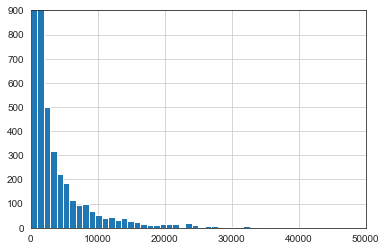

In [36]:
ratings['num of ratings'].hist(bins=70)
plt.ylim(0,900)
plt.xlim(0,5000)

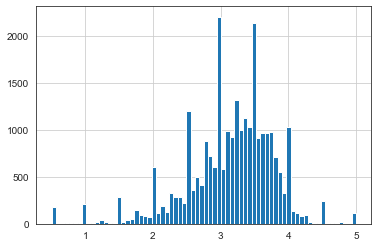

In [37]:
ratings['rating'].hist(bins=70)

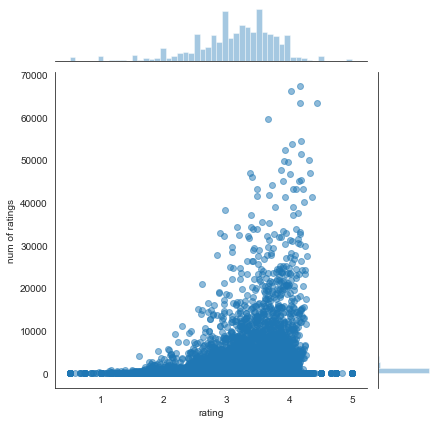

In [38]:
sns.jointplot(x='rating',y='num of ratings',data=ratings,alpha=0.5)

In [60]:
data = df.loc[df['movieId']<500]

In [61]:
data.shape

(3336651, 5)

In [62]:
data.head()

,movieId,title,userId,rating,timestamp
0,1,Toy Story (1995),3,4.0,1999-12-11 13:36:47
1,1,Toy Story (1995),6,5.0,1997-03-13 17:50:52
2,1,Toy Story (1995),8,4.0,1996-06-05 13:37:51
3,1,Toy Story (1995),10,4.0,1999-11-25 02:44:47
4,1,Toy Story (1995),11,4.5,2009-01-02 01:13:41


In [64]:
len(df['userId'].unique())

138493

In [69]:
data1 = df[df['userId']<5000]


In [73]:
data1 = data1[data1['movieId']<2000]

In [74]:
data1.shape

(351860, 5)

In [75]:
data1.head()

,movieId,title,userId,rating,timestamp
0,1,Toy Story (1995),3,4.0,1999-12-11 13:36:47
1,1,Toy Story (1995),6,5.0,1997-03-13 17:50:52
2,1,Toy Story (1995),8,4.0,1996-06-05 13:37:51
3,1,Toy Story (1995),10,4.0,1999-11-25 02:44:47
4,1,Toy Story (1995),11,4.5,2009-01-02 01:13:41


In [78]:
print(len(data1['movieId'].unique()))
print(len(data1['userId'].unique()))

1840
4991


In [79]:
moviemat = data1.pivot_table(index='userId',columns='title',values='rating')

In [80]:
moviemat.head()

title,'Til There Was You (1997),1-900 (06) (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (One Eight Seven) (1997),2 Days in the Valley (1996),2 ou 3 choses que je sais d'elle (2 or 3 Things I Know About Her) (1967),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon On Mega Mountain (1998),...,Yankee Zulu (1994),"Yes, Madam (a.k.a. Police Assassins) (a.k.a. In the Line of Duty 2) (Huang gu shi jie) (1985)",You Can't Take It with You (1938),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zero Effect (1998),Zero Kelvin (Kjærlighetens kjøtere) (1995),Zeus and Roxanne (1997)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
ratings.sort_values('num of ratings',ascending=False).head(10)

,rating,num of ratings
title,,
Pulp Fiction (1994),4.174231,67310
Forrest Gump (1994),4.029000,66172
"Shawshank Redemption, The (1994)",4.446990,63366
"Silence of the Lambs, The (1991)",4.177057,63299
Jurassic Park (1993),3.664741,59715
Star Wars: Episode IV - A New Hope (1977),4.190672,54502
Braveheart (1995),4.042534,53769
Terminator 2: Judgment Day (1991),3.931954,52244
"Matrix, The (1999)",4.187186,51334


In [117]:
terminator_user_ratings = moviemat['Jungle Book, The (1994)']

In [118]:
terminator_user_ratings.unique()

array([nan, 3. , 4. , 3.5, 5. , 1.5, 1. , 2. , 2.5, 4.5, 0.5])

In [119]:
similar_to_terminator = moviemat.corrwith(terminator_user_ratings)

E:\anaconda\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
E:\anaconda\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [120]:
corr_terminator = pd.DataFrame(similar_to_terminator,columns=['correlation'])
corr_terminator.dropna(inplace=True)
corr_terminator.head()

,correlation
title,
'Til There Was You (1997),0.469157
101 Dalmatians (1996),0.295109
12 Angry Men (1957),0.195406
187 (One Eight Seven) (1997),0.846154
2 Days in the Valley (1996),0.176121


In [121]:
corr_terminator = corr_terminator.join(ratings['num of ratings'])
corr_terminator.head()

,correlation,num of ratings
title,,
'Til There Was You (1997),0.469157,520
101 Dalmatians (1996),0.295109,8581
12 Angry Men (1957),0.195406,12934
187 (One Eight Seven) (1997),0.846154,696
2 Days in the Valley (1996),0.176121,3142


In [124]:
corr_terminator[corr_terminator['num of ratings']>1500].sort_values('correlation',ascending=False).head(20)

,correlation,num of ratings
title,,
"Jungle Book, The (1994)",1.000000,7629
Insomnia (1997),1.000000,1621
"Thin Blue Line, The (1988)",0.973329,2700
Suicide Kings (1997),0.956506,2199
Chungking Express (Chung Hing sam lam) (1994),0.931695,2309
Selena (1997),0.846391,1608
"House of Yes, The (1997)",0.835762,1560
Little Buddha (1993),0.815642,1825
"Double Life of Veronique, The (Double Vie de Véronique, La) (1991)",0.778941,1727
